<a href="https://colab.research.google.com/github/Emma-Ok/Data-science-project/blob/main/practical_sessions/ps_5_imputacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/mariabda2/intro_data_2025/blob/main/Local/imgs/U1/banner_fcd.jpg?raw=1" alt="banner" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>Ejercicio 1. Limpieza e imputación de un conjunto de datos mixto</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'Nombre': ['Ana', 'Luis', 'Pedro', None, 'Marta', 'Luis', 'Sofía'],
        'Edad': [25, np.nan, 35, 29, -5, 25, None],
        'Ciudad': ['Bogotá', 'Medellín', None, 'Medellín', 'Cali', 'Bogotá', 'Cali'],
        'Ingreso': [3500, 4800, np.nan, 5200, 5100, np.nan, 4700],
        'FechaIngreso': ['2023-01-01', '2023-01-05', None, '2023-01-10', '2023-01-12', None, '2023-01-15']
    })

2. En un nuevo notebook, aplica las etapas del proceso de limpieza e imputación de datos que consideres necesarias sobre el DataFrame df. Ten encuenta incluir:
    - Código correctamente comentado y ejecutado.
    - Explicaciones breves de cada paso.
    - Resultados visuales o estadísticos que evidencien las transformaciones.

In [2]:
import pandas as pd
import numpy as np

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer


np.random.seed(42)

df = pd.DataFrame({
    "Edad": [23, np.nan, 35, 29, np.nan, 42, 28, 33, np.nan, 40],
    "Ingresos": [3000, 4000, np.nan, 3500, 4200, np.nan, 3700, 3900, 4100, np.nan],
    "Ciudad": ["Bogotá", "Cali", "Medellín", np.nan, "Cali", "Bogotá", "Bogotá", np.nan, "Medellín", "Cali"],
    "Genero": ["M", "F", np.nan, "M", "F", "F", "M", "F", np.nan, "M"]
})

print("Vista inicial del DataFrame:")
display(df)

Vista inicial del DataFrame:


,Edad,Ingresos,Ciudad,Genero
0,23.0,3000.0,Bogotá,M
1,NaN,4000.0,Cali,F
2,35.0,NaN,Medellín,NaN
3,29.0,3500.0,NaN,M
4,NaN,4200.0,Cali,F
5,42.0,NaN,Bogotá,F
6,28.0,3700.0,Bogotá,M
7,33.0,3900.0,NaN,F
8,NaN,4100.0,Medellín,NaN
9,40.0,NaN,Cali,M


In [29]:
# -----------------------------
# DETECCIÓN DE VALORES FALTANTES
# -----------------------------
faltantes = df.isnull().sum().sort_values(ascending=False)
porcentaje_faltantes = (faltantes / len(df)) * 100

faltantes_df = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Porcentaje (%)': porcentaje_faltantes
})

print("📉 Resumen de valores faltantes por columna:")
display(faltantes_df)


📉 Resumen de valores faltantes por columna:


,Valores Faltantes,Porcentaje (%)
Edad,3,30.0
Ingresos,3,30.0
Ciudad,2,20.0
Genero,2,20.0


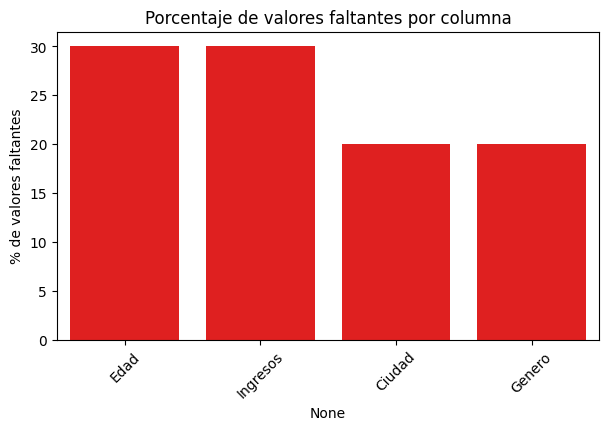

In [26]:
# gráfico de barras
plt.figure(figsize=(7,4))
sns.barplot(x=faltantes_df.index, y=faltantes_df['Porcentaje (%)'], color="red")

plt.title("Porcentaje de valores faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xticks(rotation=45)
plt.show()

<Figure size 500x300 with 0 Axes>

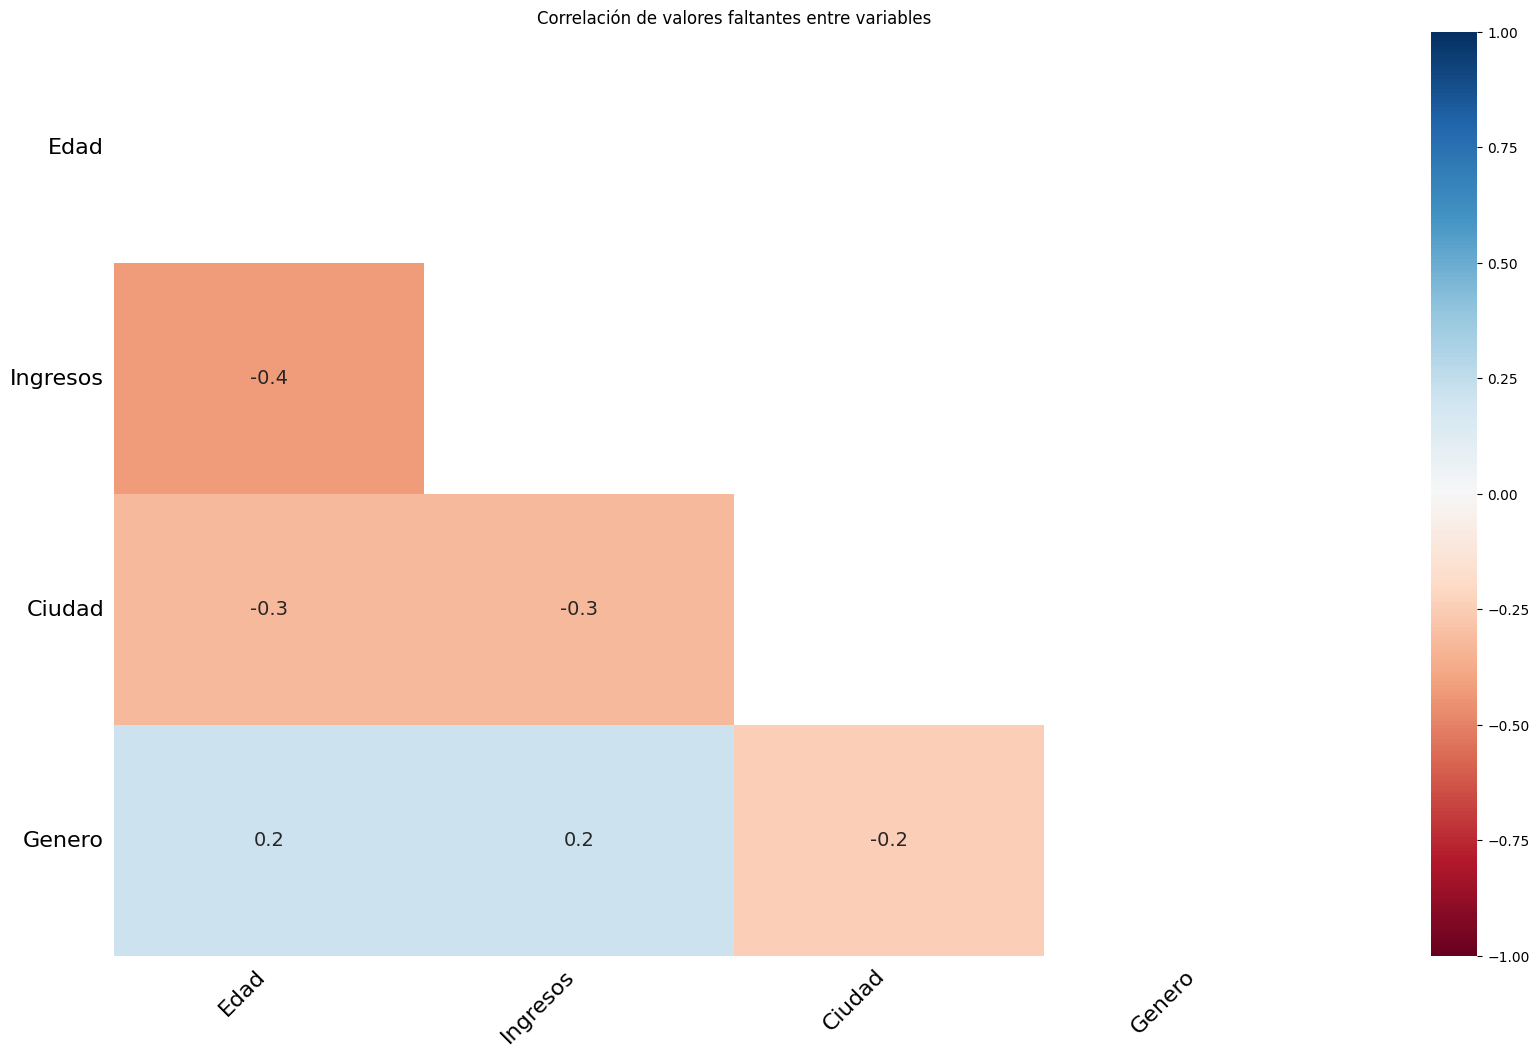

In [27]:
plt.figure(figsize=(5,3))
msno.heatmap(df)
plt.title("Correlación de valores faltantes entre variables")
plt.show()

<Figure size 600x400 with 0 Axes>

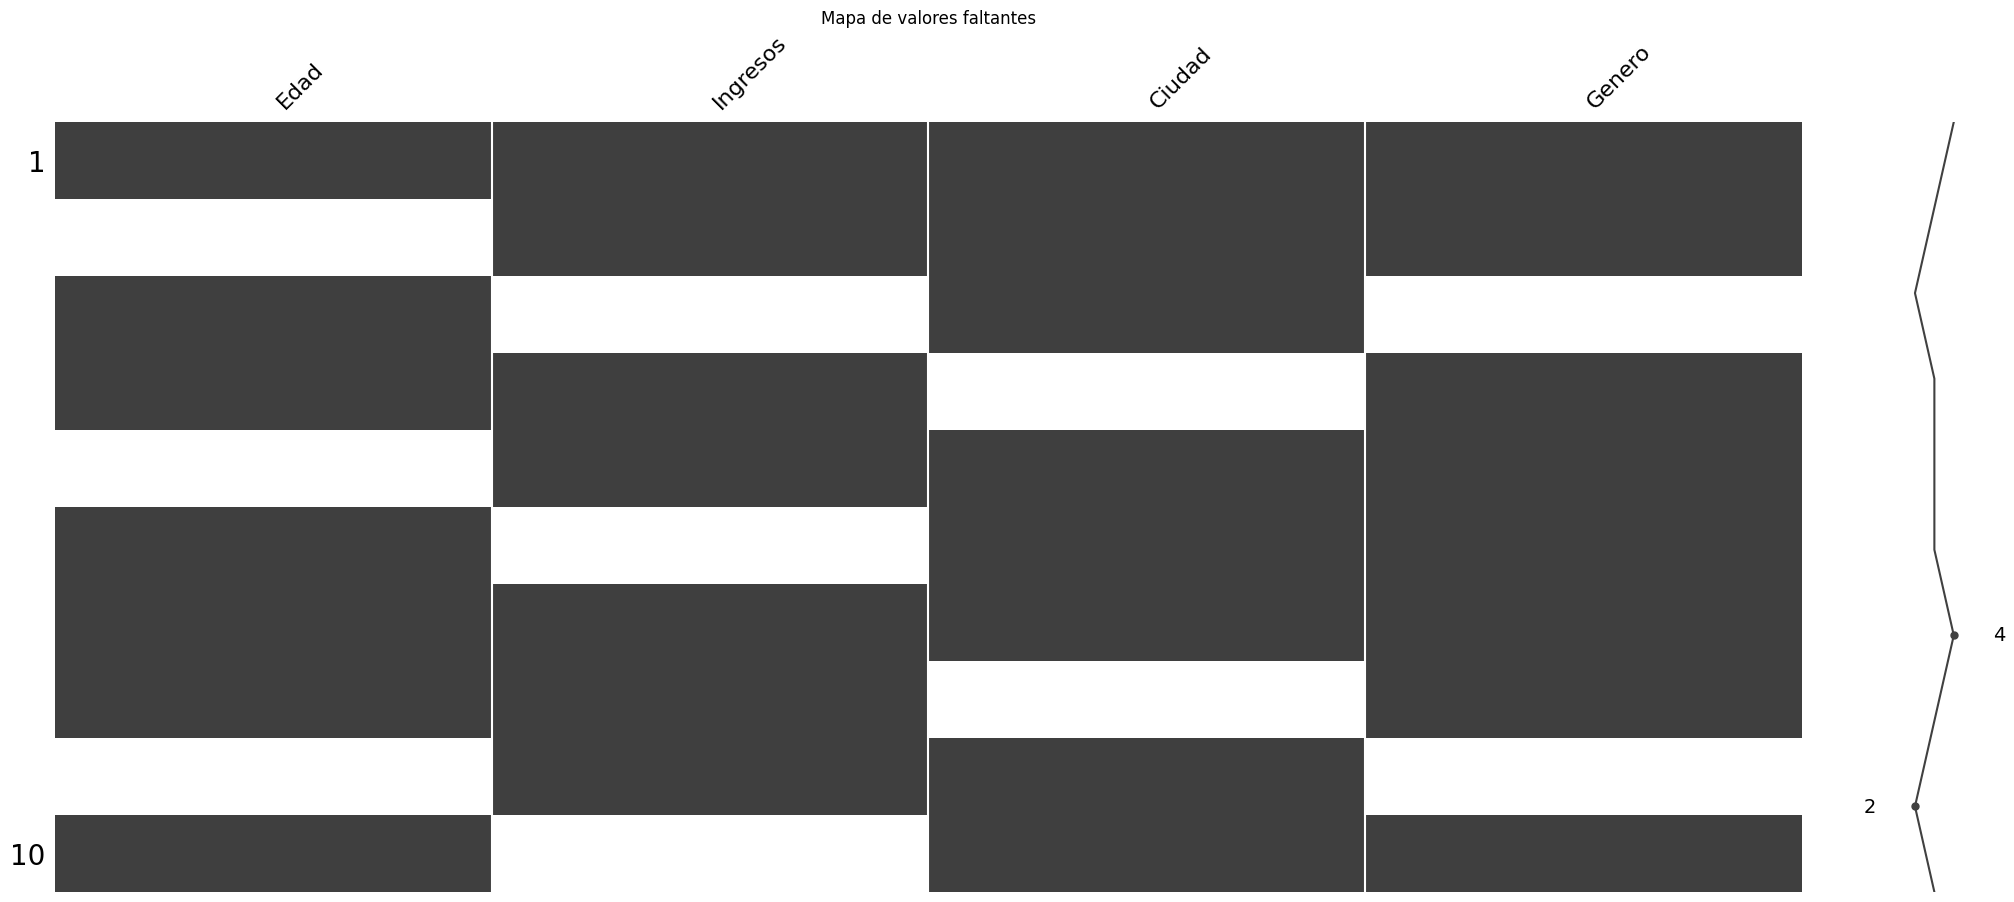

In [28]:
plt.figure(figsize=(6,4))
msno.matrix(df)
plt.title("Mapa de valores faltantes")
plt.show()

In [14]:

print(f"Duplicados detectados: {df.duplicated().sum()}")


Duplicados detectados: 0


In [15]:
# -----------------------------
# NORMALIZACIÓN DE FORMATO DE TEXTO
# -----------------------------
df["Ciudad"] = df["Ciudad"].str.strip().str.lower()
df["Genero"] = df["Genero"].str.upper()

print("Valores únicos normalizados:")
print("Ciudad:", df["Ciudad"].unique())
print("Género:", df["Genero"].unique())

Valores únicos normalizados:
Ciudad: ['bogotá' 'cali' 'medellín' nan]
Género: ['M' 'F' nan]


In [32]:
df_imputed = df.copy()


df_imputed["Edad"] = df_imputed["Edad"].fillna(df_imputed["Edad"].median())

# Imputación KNN solo sobre numéricos
num_cols = ["Edad", "Ingresos"]
imputer = KNNImputer(n_neighbors=3)
df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])

# Imputación categórica por moda
for col in ["Ciudad", "Genero"]:
    moda = df_imputed[col].mode()[0]
    df_imputed[col] = df_imputed[col].fillna(moda)

print("\nImputación completada.")
pd.set_option('display.max_rows', None)
display(df_imputed)



Imputación completada.


,Edad,Ingresos,Ciudad,Genero
0,23.0,3000.0,bogotá,M
1,33.0,4000.0,cali,F
2,35.0,4100.0,medellín,F
3,29.0,3500.0,bogotá,M
4,33.0,4200.0,cali,F
5,42.0,4100.0,bogotá,F
6,28.0,3700.0,bogotá,M
7,33.0,3900.0,bogotá,F
8,33.0,4100.0,medellín,F
9,40.0,4100.0,cali,M


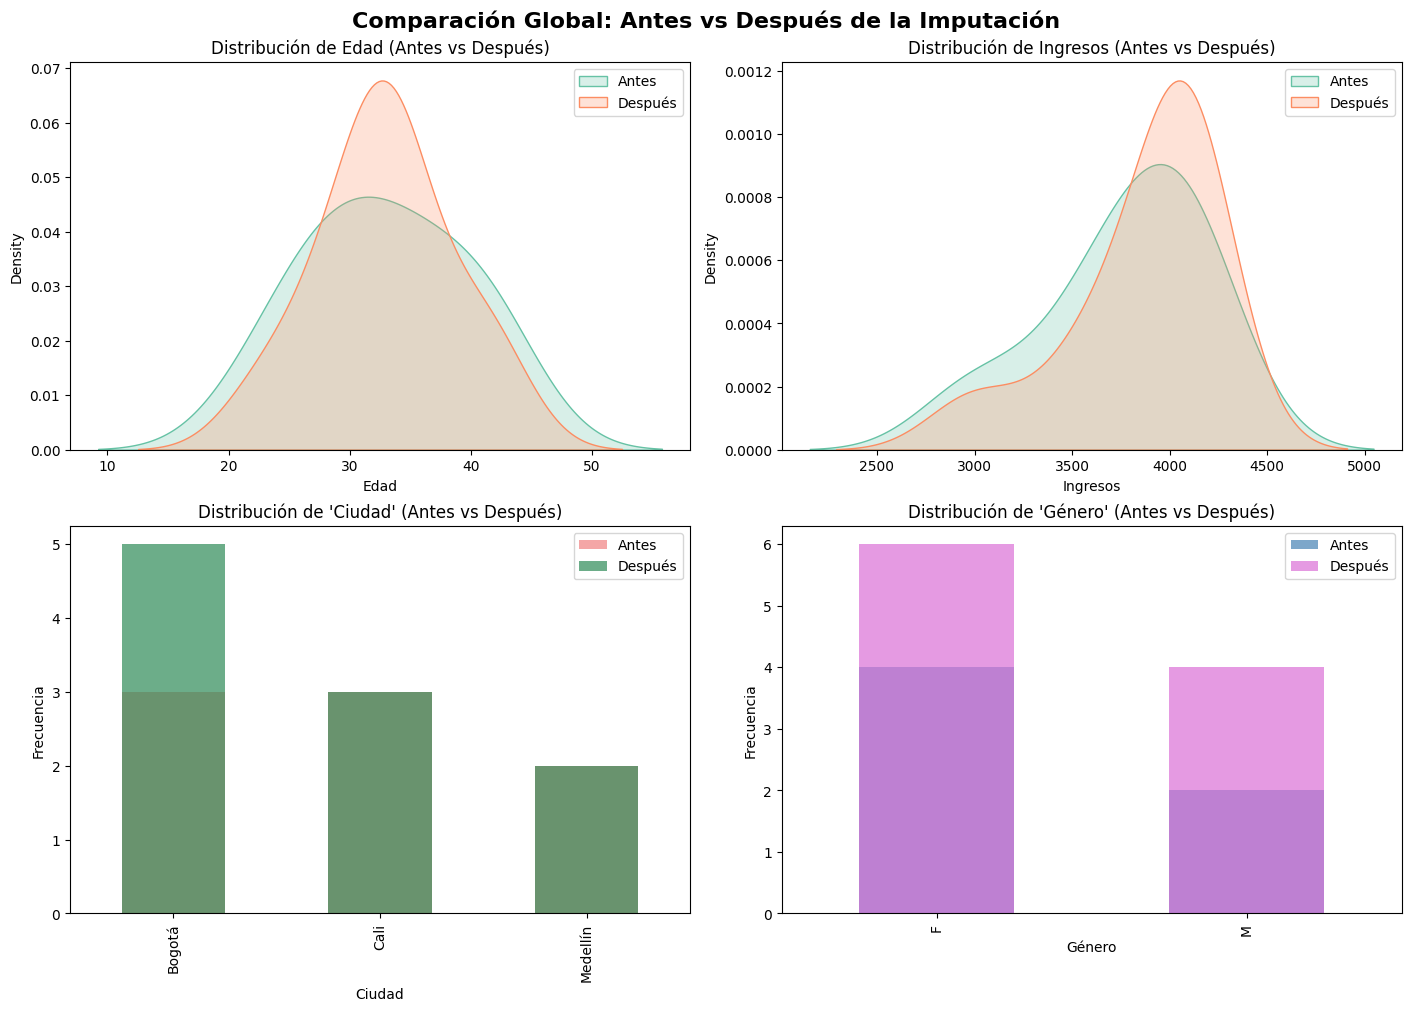

In [35]:
# ============================================================
# DASHBOARD DE COMPARACIÓN VISUAL
# ============================================================

plt.style.use("default")
sns.set_palette("Set2")

fig = plt.figure(figsize=(14, 10), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ============================================================
# VARIABLES NUMÉRICAS
# ============================================================

ax1 = fig.add_subplot(gs[0, 0])
sns.kdeplot(df["Edad"], label="Antes", fill=True, ax=ax1)
sns.kdeplot(df_imputed["Edad"], label="Después", fill=True, ax=ax1)
ax1.set_title("Distribución de Edad (Antes vs Después)")
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
sns.kdeplot(df["Ingresos"], label="Antes", fill=True, ax=ax2)
sns.kdeplot(df_imputed["Ingresos"], label="Después", fill=True, ax=ax2)
ax2.set_title("Distribución de Ingresos (Antes vs Después)")
ax2.legend()

# ============================================================
# VARIABLES CATEGÓRICAS
# ============================================================

df_cat = pd.DataFrame({
    "Ciudad_Antes": df["Ciudad"].fillna("Faltante").str.title(),
    "Ciudad_Después": df_imputed["Ciudad"].str.title(),
    "Genero_Antes": df["Genero"].fillna("Faltante"),
    "Genero_Después": df_imputed["Genero"]
})

ax3 = fig.add_subplot(gs[1, 0])
df_cat["Ciudad_Antes"].value_counts().sort_index().plot(
    kind="bar", color="lightcoral", ax=ax3, alpha=0.7, label="Antes")
df_cat["Ciudad_Después"].value_counts().sort_index().plot(
    kind="bar", color="seagreen", ax=ax3, alpha=0.7, label="Después")
ax3.set_title("Distribución de 'Ciudad' (Antes vs Después)")
ax3.set_xlabel("Ciudad")
ax3.set_ylabel("Frecuencia")
ax3.legend()

ax4 = fig.add_subplot(gs[1, 1])
df_cat["Genero_Antes"].value_counts().sort_index().plot(
    kind="bar", color="steelblue", ax=ax4, alpha=0.7, label="Antes")
df_cat["Genero_Después"].value_counts().sort_index().plot(
    kind="bar", color="orchid", ax=ax4, alpha=0.7, label="Después")
ax4.set_title("Distribución de 'Género' (Antes vs Después)")
ax4.set_xlabel("Género")
ax4.set_ylabel("Frecuencia")
ax4.legend()

fig.suptitle("Comparación Global: Antes vs Después de la Imputación",
             fontsize=16, fontweight="bold")

plt.show()


## <span style="color:#2F749F;"><strong>Ejercicio 2. Limpieza de duplicados</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'ID': [101, 102, 102, 103, 104, 104, 104],
        'Nombre': ['Ana', 'Luis', 'Luis', 'Marta', 'Carlos', 'Carlos', 'Carlos'],
        'Edad': [25, 30, 30, 29, 40, 40, 41],
        'Ciudad': ['Bogotá', 'Cali', 'Cali', 'Medellín', 'Cali', 'Cali', 'Cali'],
        'FechaRegistro': ['2023-01-01', '2023-01-05', '2023-01-05', '2023-01-10',
                        '2023-01-15', '2023-01-15', '2023-01-16']
    })

2.  En el mismo notebook anterior, para el nuevo dataframe df, responde a las siguientes preguntas (utilizando python):
    - ¿Cuál es el total de registros originales?
    - ¿Cuáles y cuántos son los duplicados exactos?
    - ¿Cuáles y cuántos son los duplicados por varias columnas?
    - ¿Cuántos registros debes eliminar?
    - ¿Cuántos registros quedan después de la limpieza?

In [36]:
df_2 = pd.DataFrame({
    'ID': [101, 102, 102, 103, 104, 104, 104],
    'Nombre': ['Ana', 'Luis', 'Luis', 'Marta', 'Carlos', 'Carlos', 'Carlos'],
    'Edad': [25, 30, 30, 29, 40, 40, 41],
    'Ciudad': ['Bogotá', 'Cali', 'Cali', 'Medellín', 'Cali', 'Cali', 'Cali'],
    'FechaRegistro': ['2023-01-01', '2023-01-05', '2023-01-05', '2023-01-10',
                    '2023-01-15', '2023-01-15', '2023-01-16']
})

In [38]:
print("Vista inicial del DataFrame:")
display(df_2)

Vista inicial del DataFrame:


,ID,Nombre,Edad,Ciudad,FechaRegistro
0,101,Ana,25,Bogotá,2023-01-01
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
3,103,Marta,29,Medellín,2023-01-10
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15
6,104,Carlos,41,Cali,2023-01-16


In [37]:
# ------------------------------------------------------------
# Total de registros originales
# ------------------------------------------------------------
total_originales = len(df_2)
print(f"Total de registros originales: {total_originales}")

Total de registros originales: 7


In [46]:
# Duplicados exactos
duplicados_exactos = df_2[df_2.duplicated(keep=False)]
n_duplicados_exactos = duplicados_exactos.shape[0]

print(f"\nDuplicados exactos encontrados: {n_duplicados_exactos}")
display(duplicados_exactos)


Duplicados exactos encontrados: 4


,ID,Nombre,Edad,Ciudad,FechaRegistro
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15


In [47]:
# ------------------------------------------------------------
# 3. Duplicados por varias columnas (ID, Nombre, FechaRegistro)
# ------------------------------------------------------------
subset_cols = ['ID', 'Nombre', 'FechaRegistro']
duplicados_parciales = df_2[df_2.duplicated(subset=subset_cols, keep=False)]
n_duplicados_parciales = duplicados_parciales.shape[0]

print(f"\nDuplicados por columnas {subset_cols}: {n_duplicados_parciales}")
display(duplicados_parciales)


Duplicados por columnas ['ID', 'Nombre', 'FechaRegistro']: 4


,ID,Nombre,Edad,Ciudad,FechaRegistro
1,102,Luis,30,Cali,2023-01-05
2,102,Luis,30,Cali,2023-01-05
4,104,Carlos,40,Cali,2023-01-15
5,104,Carlos,40,Cali,2023-01-15


In [48]:
df_2_limpio = df_2.drop_duplicates(keep='first')
registros_eliminados = total_originales - len(df_2_limpio)

print(f"\nRegistros eliminados: {registros_eliminados}")



Registros eliminados: 2


In [49]:
registros_restantes = len(df_2_limpio)
print(f"Registros después de la limpieza: {registros_restantes}")

print("\nDataFrame limpio:")
display(df_2_limpio)

Registros después de la limpieza: 5

DataFrame limpio:


,ID,Nombre,Edad,Ciudad,FechaRegistro
0,101,Ana,25,Bogotá,2023-01-01
1,102,Luis,30,Cali,2023-01-05
3,103,Marta,29,Medellín,2023-01-10
4,104,Carlos,40,Cali,2023-01-15
6,104,Carlos,41,Cali,2023-01-16


## <span style="color:#2F749F;"><strong>Ejercicio 3. Corrección de errores tipográficos o de codificación</strong></span>

#### <span style="color:#2F749F;"><strong>📋 Instrucciones</strong></span>

1. Crea el DataFrame base **df** ejecutando el siguiente código:
    ```python
    df = pd.DataFrame({
        'Ciudad': ['bogota', 'Bogotá', 'BOGOTA', 'bogotá', 'bogata', 'Bógota', 'BogoTa', 'Cali', 'calí', 'medellín', 'medellin']
    })

2.  En el mismo notebook anterior, para el nuevo dataframe df, estandariza la variable ciudad utilizando python.

In [51]:
# ============================================================
# NORMALIZACIÓN + CORRECCIÓN AUTOMÁTICA DE CIUDADES
# ============================================================
import unicodedata
import re
from difflib import get_close_matches


df_3 = pd.DataFrame({
    'Ciudad': ['bogota', 'Bogotá', 'BOGOTA', 'bogotá', 'bogata', 'Bógota', 'BogoTa',
               'Cali', 'calí', 'medellín', 'medellin']
})

print("Vista inicial del DataFrame:")
display(df_3)


Vista inicial del DataFrame:


,Ciudad
0,bogota
1,Bogotá
2,BOGOTA
3,bogotá
4,bogata
5,Bógota
6,BogoTa
7,Cali
8,calí
9,medellín


In [53]:
# ------------------------------------------------------------
# Función de normalización textual
# ------------------------------------------------------------
def normalizar_texto(texto: str) -> str:
    """Convierte texto a minúsculas, elimina acentos y caracteres especiales."""
    if pd.isna(texto):
        return texto
    texto = texto.lower()
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    texto = re.sub(r'[^a-zñ\s]', '', texto)
    return texto.strip()

# Aplicar normalización
df_3["Ciudad_Normalizada"] = df_3["Ciudad"].apply(normalizar_texto)


In [54]:
# ------------------------------------------------------------
# Definición del catálogo de ciudades válidas
# ------------------------------------------------------------
ciudades_validas = ["Bogotá", "Cali", "Medellín"]

# ------------------------------------------------------------
# Corrección automática con coincidencia difusa
# ------------------------------------------------------------
def sugerir_ciudad(ciudad_norm: str) -> str:
    """Devuelve la ciudad válida más cercana usando coincidencia difusa."""
    if pd.isna(ciudad_norm):
        return "Desconocida"
    # Normalizar catálogo de referencia
    catalogo_norm = [normalizar_texto(c) for c in ciudades_validas]
    # Buscar coincidencias aproximadas
    coincidencias = get_close_matches(ciudad_norm, catalogo_norm, n=1, cutoff=0.6)
    if coincidencias:
        # Obtener índice y devolver forma original (con acento correcto)
        idx = catalogo_norm.index(coincidencias[0])
        return ciudades_validas[idx]
    else:
        return "Desconocida"

df_3["Ciudad_Corregida"] = df_3["Ciudad_Normalizada"].apply(sugerir_ciudad)

In [55]:
print("\nResultado de normalización y corrección automática:")
display(df_3)


Resultado de normalización y corrección automática:


,Ciudad,Ciudad_Normalizada,Ciudad_Corregida
0,bogota,bogota,Bogotá
1,Bogotá,bogota,Bogotá
2,BOGOTA,bogota,Bogotá
3,bogotá,bogota,Bogotá
4,bogata,bogata,Bogotá
5,Bógota,bogota,Bogotá
6,BogoTa,bogota,Bogotá
7,Cali,cali,Cali
8,calí,cali,Cali
9,medellín,medellin,Medellín


**Realice commit de su notebook, en la carpeta sesiones prácticas**

# <span style="color:#2F749F;"><strong>Referencias</strong></span>

Little, R. J. A., & Rubin, D. B. (2019). [*Statistical analysis with missing data*](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260). John Wiley & Sons.  

Van Buuren, S. (2018). [*Flexible imputation of missing data*](https://stefvanbuuren.name/fimd/). CRC Press.  

Zhang, S. (2011). [*Shell-neighbor method and its application in missing data imputation*](https://link.springer.com/article/10.1007/s10489-009-0207-6#:~:text=The%20SNI%20fills%20in%20an,neighbors%20of%20the%20incomplete%20instance.). *Knowledge-Based Systems, 24*(5), 709–715.  
